In [2]:
import coralme
import pandas
from coralme.solver.solver import ME_NLP
import cobra
import numpy
#from coralme.core.optimization import fva
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)
import inspect

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
import math
import coralme
import pandas
from coralme.solver.solver import ME_NLP
import cobra
import numpy
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)




In [3]:
coralme.__version__

'1.1.12'

In [2]:
me=coralme.io.pickle.load_pickle_me_model("./MEModel-step3-Ax-TS.pkl")

Set parameter Username
Set parameter LicenseID to value 2654766
Academic license - for non-commercial use only - expires 2026-04-20
Read LP format model from file /tmp/tmpwir9aw2c.lp
Reading time = 0.01 seconds
: 1786 rows, 4314 columns, 17098 nonzeros
Read LP format model from file /tmp/tmp_nhq8l97.lp
Reading time = 0.01 seconds
: 1786 rows, 4310 columns, 16902 nonzeros


In [3]:
me.reactions.get_by_id('EX_nh4_e').lower_bound=-5
me.reactions.get_by_id('EX_succ_e').lower_bound=-5
assert me.optimize() == True


Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	1.4050280687025918	Not feasible
        2	0.7025140343512959	Not feasible
        3	0.3512570171756479	Not feasible
        4	0.1756285085878240	Optimal
        5	0.2634427628817360	Not feasible
        6	0.2195356357347800	Optimal
        7	0.2414891993082580	Not feasible
        8	0.2305124175215190	Not feasible
        9	0.2250240266281495	Not feasible
       10	0.2222798311814647	Optimal
       11	0.2236519289048071	Not feasible
       12	0.2229658800431359	Not feasible
       13	0.2226228556123003	Optimal
       14	0.2227943678277181	Not feasible
       15	0.2227086117200092	Optimal
       16	0.2227514897738637	Not feasible
       17	0.2227300507469364	Not feasible
       18	0.2227193312334728	Optimal
       19	0.2227246909902046	Not feasible
       20	0.2227220111118387	Not feasible
       21	0.2227206711726558	Not feasible
       22	0.2227200012030643	Not feasible


In [ ]:
me_model_fva = me.fva([r for r in me.reactions if isinstance(r,coralme.core.reaction.MetabolicReaction)],
                      fraction_of_optimum=1.0)

Running FVA for 5987 reactions. Maximum growth rate fixed to 0.222719
working


In [8]:
me_model_fva.to_csv("me_model.csv")

In [9]:
#compare

In [117]:
m_model_fva = pandas.read_csv("m_model.csv",index_col=0)
me_model_fva = pandas.read_csv("me_model.csv",index_col=0)

In [118]:
def get_deltas(df):
    tmp = (df["maximum"] - df["minimum"]).abs()
    tmp = tmp[tmp>1e-30]
    return numpy.log10(tmp)


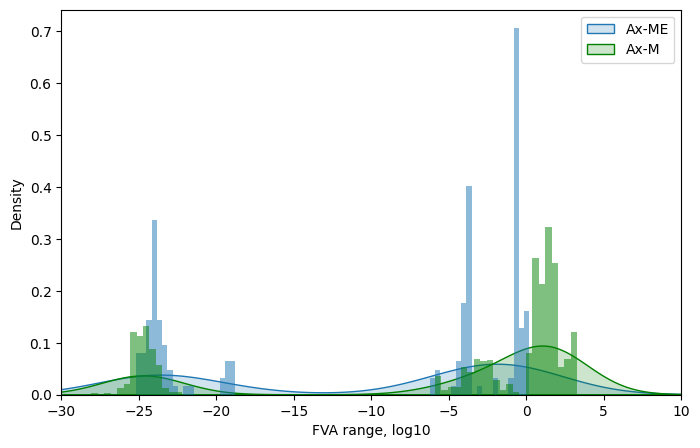

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
data1 = get_deltas(me_model_fva).values
data2 = get_deltas(m_model_fva).values

# Create density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data1, label='Ax-ME', fill=True, alpha=0.2)
sns.kdeplot(data2, label='Ax-M', fill=True, alpha=0.2,color="green")
plt.hist(data1, bins=75, density=True, alpha=0.5)
plt.hist(data2, bins=75, density=True, alpha=0.5,color="green")
plt.xlim(-30,10)
# plt.vlines(x=-16,ymin=0.,ymax=0.35,linestyles="--",color="gray")

plt.xlabel("FVA range, log10")
plt.ylabel("Density")
plt.legend()
plt.savefig("./figures/FVA-MvsME.svg",format="SVG")


In [16]:
# Comparison of FBA fluxes between me and M-models

In [3]:
#Me-model
me=coralme.io.pickle.load_pickle_me_model("./MEModel-step3-Ax-TS.pkl")
me.reactions.get_by_id('EX_nh4_e').lower_bound=-5
me.reactions.get_by_id('EX_succ_e').lower_bound=-5
me.optimize()

Set parameter Username
Set parameter LicenseID to value 2654766
Academic license - for non-commercial use only - expires 2026-04-20
Read LP format model from file /tmp/tmpeexip2lt.lp
Reading time = 0.01 seconds
: 1786 rows, 4314 columns, 17098 nonzeros
Read LP format model from file /tmp/tmpay4vjxai.lp
Reading time = 0.01 seconds
: 1786 rows, 4310 columns, 16902 nonzeros
Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	1.4050280687025918	Not feasible
        2	0.7025140343512959	Not feasible
        3	0.3512570171756479	Not feasible
        4	0.1756285085878240	Optimal
        5	0.2634427628817360	Not feasible
        6	0.2195356357347800	Optimal
        7	0.2414891993082580	Not feasible
        8	0.2305124175215190	Not feasible
        9	0.2250240266281495	Not feasible
       10	0.2222798311814647	Optimal
       11	0.2236519289048071	Not feasible
       12	0.2229658800431359	Not feasible
       13	0.2226228556123003	Optimal
       14	0.22

True

In [4]:
#M-model
m_model=cobra.io.read_sbml_model("./inputs/m_model.xml")
m_model.reactions.get_by_id("EX_nh4_e").lower_bound=-5
m_model.reactions.get_by_id("EX_nh4_e").upper_bound=-5
sol1 = m_model.optimize().to_frame()["fluxes"]

In [5]:
sol1.to_csv("./metabolic-flux-analysis/m_model_metabolic_fluxes.csv")

In [6]:
sol1_abs=sol1.abs()
sol1_abs_nonzero=sol1_abs+1e-6

In [7]:
sol1_abs_nonzero.to_csv("./metabolic-flux-analysis/m_model_metabolic_fluxes_abs.csv")

In [8]:
# Me-model
sol2 = pandas.Series(me.get_metabolic_flux()).rename("fluxes")



Building reaction dictionary...                                            : 100.0%|██████████|  1793/ 1793 [00:00<00:00]
Processing ME-model Reactions...                                           : 100.0%|██████████| 12825/12825 [00:00<00:00]


In [9]:
sol2.to_csv("./metabolic-flux-analysis/me_model_metabolic_fluxes.csv")

In [10]:
sol2_abs=sol2.abs()
sol2_abs_nonzero=sol2_abs+1e-6
sol2_abs_nonzero.to_csv("./metabolic-flux-analysis/me_model_metabolic_fluxes_abs.csv")

In [11]:
#Comparison

In [98]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from scipy.stats import pearsonr


In [99]:
df = pandas.concat([sol1_abs_nonzero.rename("M"),sol2_abs_nonzero.rename("ME")],axis=1).dropna()

In [100]:
df = numpy.log10(df.abs()).dropna()

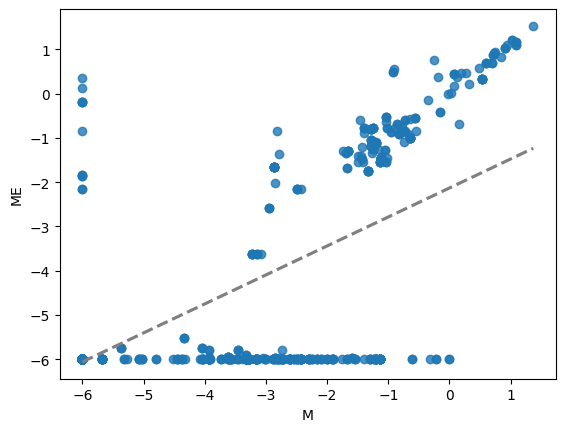

In [112]:
sns.regplot(x='M', y='ME', data=df, ci=None,line_kws={'color':'gray', 'linestyle':'--'})
plt.savefig('./figures/regression_plot.svg', dpi=600, format="SVG")

In [102]:
#Calculating pearson correlation
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df['M'], df['ME'])
print(f'Pearson correlation coefficient: {corr_coef}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.7385647197701919
P-value: 0.0


In [17]:
p_value

0.0

In [42]:
# Comparing model properties between m model and me model
properties=pd.DataFrame(columns=["M","ME"])
properties

properties.loc['Reactions','M']=len(m_model.reactions)
properties.loc['Metabolites','M']=len(m_model.metabolites)
properties.loc['Genes','M']=len(m_model.genes)


properties.loc['Reactions','ME']=len(me.reactions)
properties.loc['Metabolites','ME']=len(me.metabolites)
properties.loc['Genes','ME']=len(me.genes)

In [59]:
properties

,M,ME
Reactions,2157,12825
Metabolites,1786,6572
Genes,1296,1492


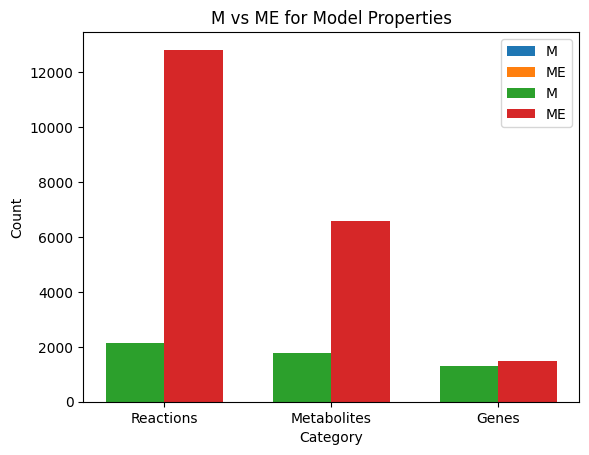

In [114]:
index = np.arange(len(properties))
bar_width = 0.35
plt.bar(index, properties['M'], bar_width, label='M')
plt.bar(index + bar_width, properties['ME'], bar_width, label='ME')
plt.bar(index, properties['M'], bar_width, label='M')
plt.bar(index + bar_width, properties['ME'], bar_width, label='ME')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('M vs ME for Model Properties')
plt.xticks(index + bar_width / 2, properties.index)
plt.legend()

plt.savefig('./figures/models_properties.svg', dpi=600, format="SVG")

In [94]:
# Me model breakdown of its reactions
me_model_reactions_type=pd.DataFrame(columns=['Reaction_type'])

met_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.MetabolicReaction):
        met_reactions +=1
        me_model_reactions_type.loc['Metabolic_Reactions','Reaction_type']=met_reactions
        

Translation_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.TranslationReaction):
        Translation_reactions +=1
        me_model_reactions_type.loc['Translation_reactions','Reaction_type']=Trans_reactions

Transcription_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.TranscriptionReaction):
        Transcription_reactions +=1
        me_model_reactions_type.loc['Transcription_reactions','Reaction_type']=Transcription_reactions

ComplexFormation_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.ComplexFormation):
        ComplexFormation_reactions +=1
        me_model_reactions_type.loc['ComplexFormation_reactions','Reaction_type']=ComplexFormation_reactions
        
tRNACharging_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.tRNAChargingReaction):
        tRNACharging_reactions +=1
        me_model_reactions_type.loc['tRNACharging_reactions','Reaction_type']=tRNACharging_reactions
        
Post_translational_reactions=0
for r in me.reactions:
    if isinstance(r,coralme.core.reaction.PostTranslationReaction):
        Post_translational_reactions +=1
        me_model_reactions_type.loc['Post_translational_reactions','Reaction_type']=Post_translational_reactions        
        
me_model_reactions_type       

,Reaction_type
Metabolic_Reactions,5987
Translation_reactions,11246
Transcription_reactions,1493
ComplexFormation_reactions,1534
tRNACharging_reactions,210
Post_translational_reactions,244


In [97]:
me_model_reactions_type.to_csv('./dataset/me_model_properties_reactions.csv')

In [89]:
me.reactions.query("tRNAChargingReaction charging_tRNA_222.273.rna.1_AAU")

[]

In [106]:
sol1_abs

CYTDK2        0.000000
XPPT          0.000000
HXPRT         0.000000
NDPK5         0.006904
SHK3Dr        0.227403
                ...   
NO3R1bpp      3.435069
BIOMASS_WT    0.000000
CLPNH161pp    0.000000
CLPNS161pp    0.000089
EX_no2_e      0.000000
Name: fluxes, Length: 2157, dtype: float64

In [107]:
sol1_abs_nonzero

CYTDK2        0.000001
XPPT          0.000001
HXPRT         0.000001
NDPK5         0.006905
SHK3Dr        0.227404
                ...   
NO3R1bpp      3.435070
BIOMASS_WT    0.000001
CLPNH161pp    0.000001
CLPNS161pp    0.000090
EX_no2_e      0.000001
Name: fluxes, Length: 2157, dtype: float64